Advanced Concepts in OpenCV

1. ColorSpaces (RGB, greyScale, etc.)

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt 

img = cv.imread("photos/ryuga.jpg")

In [2]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv.imshow("gray", gray)
cv.imshow("ryuga", img)

#From BGR to HSV
#HSV is closer to how humans perceive color. It has three components: hue, saturation, and value.

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

cv.imshow("hsv", hsv)

#BGR to lab
# L*: Lightness. a*: Red/Green Value. b*: Blue/Yellow Value.
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
cv.imshow("lab", lab)

#cv percieves it as bgr but matplotlib percieves it as rgb, here we must convert bgr to rgb 

cv.waitKey(0)

2. Color Channels 

In [3]:
#openCV allows you to split an image into respective color channels

b,g,r = cv.split(img)

cv.imshow('blu', b)
cv.imshow('green', g)
cv.imshow('red', r)

#img is shown in gray scale, here the brighter part of the img represents conceptration of that certain color

print(img.shape)
print(b.shape)
print(g.shape)
print(r.shape)

merged = cv.merge([b,g,r])
cv.imshow('merger', merged)

cv.waitKey(0)

(281, 500, 3)
(281, 500)
(281, 500)
(281, 500)


-1

In [5]:
#To be able to visualise the concentrations of BGR, we can merge them with black 

blank = np.zeros(img.shape[:2], dtype='uint8')

blue = cv.merge([b, blank, blank])
green = cv.merge([blank, g, blank])
red = cv.merge([blank, blank, r])

cv.imshow('r', red)
cv.imshow('g', green)
cv.imshow('b', blue)

cv.waitKey(0)

-1

3. Blurring Techniques

In [22]:
#averaging ---------------------

average = cv.blur(img, (7,7))
#the 2nd argument is the kernel size over which we average the center pixel

cv.imshow("average blur", average)

cv.waitKey(0)

-1

Gaussian Blur

Instead of computing the average of all of the surrounding pixel intensity, each surrounding pixel is given a particular weight and the average of the products of those weights give you the value of the true center 

In [21]:
gaus = cv.GaussianBlur(img, (7,7), 0)
#kernel dim must be odd

cv.imshow('Gaussian Blurr', gaus)

cv.waitKey(0)

-1

Median Blur

Same as avg, instead of avg, it calculates the median of the surr pixels.

More effective in reducing noise in the img as compared to avg and gaussian blur.

In [25]:
median = cv.medianBlur(img, 3)

cv.imshow("median",median)

cv.waitKey(0)

-1

BiLateral Blurring (most effective)

It applies blurring but also retains the edges of the img

In [32]:
biL = cv.bilateralFilter(img, 7, 20, 20)
cv.imshow('biLateral', biL)

cv.waitKey(0)

-1

4. BITWISE Operations

In [38]:
blank = np.zeros((400, 400), dtype='uint8')

rectangle = cv.rectangle(blank.copy(), (30, 30), (370, 370), 255, -1)
circle = cv.circle(blank.copy(), (200, 200), 200, 255, -1)

cv.imshow('rect', rectangle)
cv.imshow('circle', circle)

#BITWISE AND

b_and = cv.bitwise_and(rectangle, circle)
cv.imshow('and', b_and)

#BITWISE OR

b_or = cv.bitwise_or(rectangle,circle)
cv.imshow('or', b_or)

#BITWISE XOR

b_xor = cv.bitwise_xor(rectangle, circle)
cv.imshow('xor', b_xor)

#BITWISE NOT

b_not = cv.bitwise_not( circle)
cv.imshow('not', b_not)

cv.waitKey(0)

-1

5. Masking

In [9]:
blank=np.zeros(img.shape[:2], dtype='uint8')

mask = cv.circle(blank, (img.shape[1]//2 + 90, img.shape[0]//2 -50), 100, 255, -1)
cv.imshow('mask', mask)

masked = cv.bitwise_and(img, img, mask=mask)
cv.imshow('masked', masked)

cv.waitKey(0)

-1

6. Computing Histograms

It allows you to visualise the distribution of pixel intensities in an image with the help of a histogram.

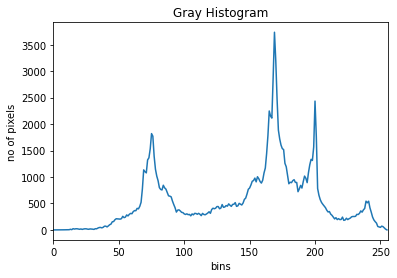

-1

In [2]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('gray', gray)

gray_hist = cv.calcHist([gray], [0], None, [256], [0,256])
#(list of images, list of channels, mask, no of bins while plotting, range of all possible pixel values)

plt.figure()
plt.title('Gray Histogram')
plt.xlabel('bins')
plt.ylabel('no of pixels')
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()

cv.waitKey(0)

We may mask an image and get it's specific histogram

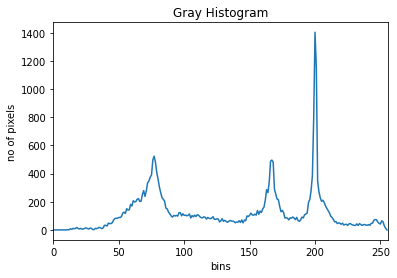

-1

In [11]:
blank=np.zeros(img.shape[:2], dtype='uint8')
circled = cv.circle(blank, (img.shape[1]//2 + 90, img.shape[0]//2 -50), 100, 255, -1)
mask = cv.bitwise_and(gray, gray, mask=circled)

gray_hist2 = cv.calcHist([gray], [0], mask, [256], [0,256])
#(list of images, list of channels, mask, no of bins while plotting, range of all possible pixel values)

cv.imshow('masked', mask)

plt.figure()
plt.title('Gray Histogram')
plt.xlabel('bins')
plt.ylabel('no of pixels')
plt.plot(gray_hist2)
plt.xlim([0,256])
plt.show()

cv.waitKey(0)

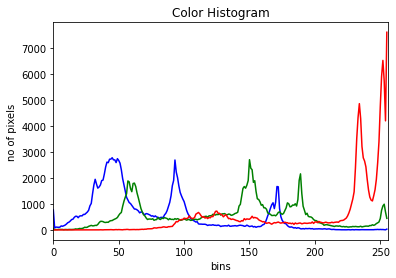

-1

In [14]:
#COLOR Histogram

plt.figure()
plt.title('Color Histogram')
plt.xlabel('bins')
plt.ylabel('no of pixels')

colors = ('b', 'g', 'r')
for i,col in enumerate(colors):
    hist = cv.calcHist([img], [i], None, [256], [0,256])
    plt.plot(hist, color = col)
    plt.xlim([0,256])
    
    
plt.show()

cv.waitKey(0)

7. Thresholding

Thresholding is basically binarizing an image. For a certain threshold value, pixels above it may be termed as 0 -> black and below it may be termed as 255 -> white.

There are 2 types: 1. Simple 2. Adaptive

In [26]:
greyy = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 

#Simple thresholding
threshold, thresh = cv.threshold(greyy, 150, 255, cv.THRESH_BINARY)
cv.imshow('simple threshold', thresh)

threshold2, thresh_inv = cv.threshold(greyy, 150, 255, cv.THRESH_BINARY_INV)
cv.imshow('simple threshold 2', thresh_inv)

cv.waitKey(0)

-1

In [30]:
#Adaptive thresholding

adaptive = cv.adaptiveThreshold(greyy, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 1)
cv.imshow('adaptive', adaptive)

cv.waitKey(0)

-1

8. Edge Detection

In [36]:
#LAPLACIAN

grayy = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

lap = cv.Laplacian(grayy, cv.CV_64F)
lap = np.uint8(np.absolute(lap))

cv.imshow('lap', lap)

#Sobel
sobelx = cv.Sobel(grayy, cv.CV_64F, 1,0)
sobely = cv.Sobel(grayy, cv.CV_64F, 0,1)
combined = cv.bitwise_or(sobelx, sobely)

cv.imshow('combined sobel', combined)
cv.imshow('sobel X', sobelx)
cv.imshow('sobel Y', sobely)


cv.waitKey(0)

-1

As compared to canny edge detector, it is a more advanced algorithm which indeed uses sobel in one of its stages.

Canny is a multi-stage process to calculate edgesof the image.


